# Predict sales revenue

Feature Descriptions
1. TV - Spend on TV Advertisements
2. Radio - Spend on radio Advertisements
3. Newspaper - Spend on newspaper Advertisements
4. Sales - Sales revenue generated

Sales is dependent / target variable

TV, Radio and Newspaper are independent variables

import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

Load Advertising data set

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


First column is index and we do not need it. So remove the first column 

In [6]:
data = data[["TV", "Radio", "Newspaper", "Sales"]]

In [7]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


# Explore the data set

Load matplotlib and seaborn libraries for visual analytics

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Visualize pairwise correlations

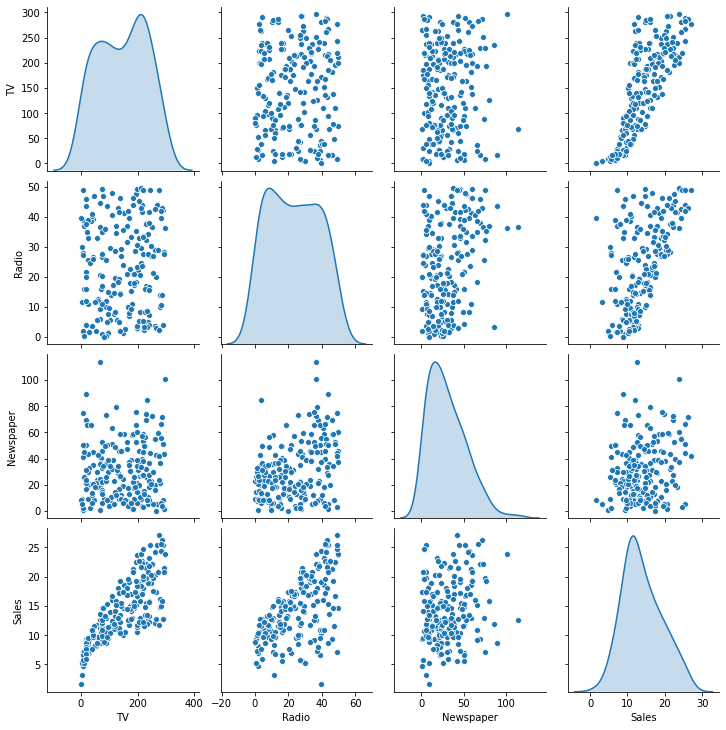

In [9]:
sns.pairplot( data , diag_kind='kde')

Calculate correlations

In [10]:
data.TV.corr( data.Sales )

0.7822244248616061

In [11]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Visualize the correlations

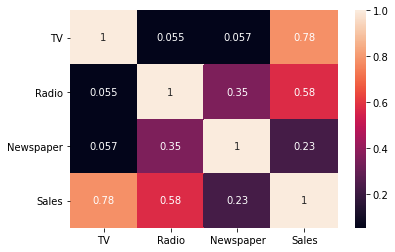

In [12]:
sns.heatmap( data.corr(), annot=True)

Observations: 
1. The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. We can observe that the correlation betweeb TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.
2. Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with strong correlations are mostly probably candidates for model builing.

# Predict Sales revenue using TV advertisement expenditure

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linreg = LinearRegression()

Prepare input data set

In [15]:
x = data[['TV']]

In [16]:
type(x)

pandas.core.frame.DataFrame

In [17]:
y = data[['Sales']]

In [18]:
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Make predictions for the new TV advertisment expenditure data

Suppose TV = 150 . Predict Sales?

In [19]:
TV = 150
Sales = linreg.intercept_ + linreg.coef_*TV

In [20]:
Sales

array([[14.16308961]])

We can also use inbuilt function for prediction

In [21]:
newData = {'TV': [150, 200, 250]}
newData = pd.DataFrame(data=newData)  ## Observe that 'x' type is pandas dataframe

In [22]:
linreg.predict(newData)

array([[14.16308961],
       [16.53992164],
       [18.91675366]])

Calculate accuracy of the built model

In [23]:
model = linreg.fit(x, y)

In [24]:
SalesPredictions = model.predict(x)

In [25]:
SalesPredictions[0:5]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814]])

In [26]:
y[0:5]

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Calculate root mean sequare error: RMSE

In [27]:
from sklearn import metrics

In [28]:
metrics.mean_squared_error(SalesPredictions, y)

10.512652915656757

In [29]:
rmse = np.sqrt(metrics.mean_squared_error(SalesPredictions, y))

In [30]:
rmse

3.2423221486546887

In [31]:
avgSales = np.mean(y)

In [32]:
avgSales

Sales    14.0225
dtype: float64

In [33]:
rmse/avgSales*100

Sales    23.122283
dtype: float64

In [34]:
# R^2
model.score(x,y)

0.611875050850071

# Model 2

In [36]:
x = data[["TV","Radio"]]
y = data[["Sales"]]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
#Without Newspaper
print("Training R2")
print(model2.score(x_train,y_train))
print("Testing R2")
print(model2.score(x_test,y_test))

Training R2
0.8958528468776601
Testing R2
0.8947344950027066


In [41]:
x = data[["Radio"]]
y = data[["Sales"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predictedSales = model2.predict(x_train)
mse = metrics.mean_squared_error(predictedSales, y_train)
trainRmse = np.sqrt(mse)
predictedSales = model2.predict(x_test)
mse = metrics.mean_squared_error(predictedSales, y_test)
testRmse = np.sqrt(mse)
print(testRmse)

3.8215351050686674


In [43]:
testRmse/np.mean(y_train)*100

Sales    27.709494
dtype: float64

In [45]:
predictedSales = model2.predict(x_train)

In [46]:
mse = metrics.mean_squared_error(predictedSales, y_train)

In [47]:
rmse = np.sqrt(mse)
rmse 

4.4415264249912445